# Estimate recombination and mutation rates from a simulated dataset

In [1]:
import numpy
import pandas
import recombulatorx

In [2]:
my_recomb_rates = numpy.array([0.05, 0.3, 0.01, 0.2, 0.01])
my_mut_rates = numpy.array([1e-4, 1e-4, 1e-2, 1e-3, 1e-4, 1e-4])
n_fam_I = 100
n_fam_II = 100
ped_path = 'testsim.tsv'

### write a simulated dataset from the given rates

In [3]:
numpy.random.seed(0)

In [4]:
from recombulatorx.testing import individuals2ped, generate_complex_families

In [25]:
help(individuals2ped)

Help on function individuals2ped in module recombulatorx.testing:

individuals2ped(path, marker_names, individuals)



In [26]:
help(generate_complex_families)

Help on function generate_complex_families in module recombulatorx.testing:

generate_complex_families(n_fam_I: int, n_fam_II: int, recombination_rates, mutation_rates)



In [31]:
individuals2ped(
    path=ped_path, 
    marker_names=[f'M{i+1}' for i, _ in enumerate(my_mut_rates)], 
    individuals=generate_complex_families(n_fam_I, n_fam_II, my_recomb_rates, my_mut_rates)
)

In [32]:
pandas.read_csv(ped_path, sep='\t').head(10)

,FID,IID,PAT,MAT,SEX,PHENO,M1-A1,M1-A2,M2-A1,M2-A2,M3-A1,M3-A2,M4-A1,M4-A2,M5-A1,M5-A2,M6-A1,M6-A2
0,FAM_0_I,GRANDFATHER,0,0,1,-1,14.0,0.0,21.0,0.0,38.0,0.0,44.0,0.0,54.0,0.0,62.0,0.0
1,FAM_0_I,MOTHER,GRANDFATHER,0,2,-1,14.0,17.0,21.0,22.0,37.0,38.0,41.0,44.0,54.0,54.0,61.0,62.0
2,FAM_0_I,SON_1,0,MOTHER,1,-1,14.0,0.0,21.0,0.0,38.0,0.0,44.0,0.0,54.0,0.0,62.0,0.0
3,FAM_0_I,SON_2,0,MOTHER,1,-1,14.0,0.0,21.0,0.0,37.0,0.0,41.0,0.0,54.0,0.0,61.0,0.0
4,FAM_0_I,FATHER_1,0,0,1,-1,11.0,0.0,22.0,0.0,35.0,0.0,43.0,0.0,53.0,0.0,69.0,0.0
5,FAM_0_I,DAUGHTER_1,FATHER_1,MOTHER,2,-1,11.0,14.0,21.0,22.0,35.0,38.0,43.0,44.0,53.0,54.0,61.0,69.0
6,FAM_0_I,FATHER_2,0,0,1,-1,12.0,0.0,24.0,0.0,32.0,0.0,42.0,0.0,59.0,0.0,65.0,0.0
7,FAM_0_I,DAUGHTER_2,FATHER_2,MOTHER,2,-1,12.0,14.0,21.0,24.0,32.0,38.0,42.0,44.0,54.0,59.0,62.0,65.0
8,FAM_1_I,GRANDFATHER,0,0,1,-1,15.0,0.0,27.0,0.0,37.0,0.0,46.0,0.0,58.0,0.0,68.0,0.0
9,FAM_1_I,MOTHER,GRANDFATHER,0,2,-1,11.0,15.0,22.0,27.0,35.0,37.0,45.0,46.0,53.0,58.0,62.0,68.0


### read ped

load the simulated dataset

In [6]:
family_graphs, marker_names = recombulatorx.ped2graph(ped_path)
len(family_graphs)

200

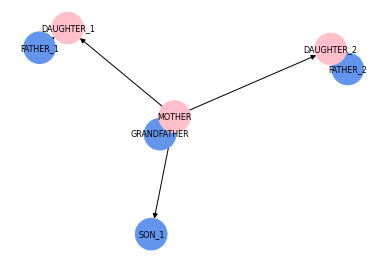

In [17]:
recombulatorx.families.plot_family_graph(family_graphs[0][1]);

In [18]:
_

<AxesSubplot:xlabel='level_0', ylabel='0'>

In [8]:
processed_families = recombulatorx.preprocess_families(family_graphs)
len(processed_families), processed_families[0]

(200,
 ProcessedFamily(fid=('FAM_0_I', 'MOTHER'), is_mother_phased=True, mother=array([[12., 16.],
        [29., 27.],
        [39., 34.],
        [43., 49.],
        [59., 54.],
        [68., 66.]]), maternal_haplotypes=array([[12., 29., 34., 49., 54., 66.],
        [16., 27., 34., 49., 54., 66.],
        [12., 29., 39., 43., 59., 68.]])))

In [9]:
help(recombulatorx.estimate_rates)

Help on function estimate_rates in module recombulatorx.estimate:

estimate_rates(families, starting_recombination_rates=0.05, starting_mutation_rates=0.001, estimate_mutation_rates='no', implementation=None, optimization_method='L-BFGS-B', maxiter=1000)
    Estimate recombination and optionally mutation rates from a set of families by expectation maximization, that is by finding recombination and mutation rates that maximize the likelihood of observing the given families.
    Implemented using scipy.optimize.minimize to find recombination and mutation rates that minimize the negative log likelihood.
    
    families: sequence of families
        the preprocessed genetic data of all the families
    starting_recombination_rates: array of shape (n_markers - 1, )
        starting probability of recombination between adjacent markers as initial 
    starting_mutation_rates: array of shape (n_markers, )
        probability of unit mutation (+1 or -1) for each marker
    estimate_mutation_

In [10]:
est_recomb_rates, est_mut_rates = recombulatorx.estimate_rates(processed_families, 0.1, 0.1, estimate_mutation_rates='all')

In [11]:
my_recomb_rates, my_mut_rates

(array([0.05, 0.3 , 0.01, 0.2 , 0.01]),
 array([0.0001, 0.0001, 0.01  , 0.001 , 0.0001, 0.0001]))

In [12]:
est_recomb_rates, est_mut_rates

(array([0.03694945, 0.3247562 , 0.012345  , 0.1856328 , 0.00980138]),
 array([1.00000000e-08, 1.00000000e-08, 8.32904945e-03, 1.00000000e-08,
        2.15161192e-03, 1.00000000e-08]))

In [13]:
pandas.DataFrame({'simulated': my_recomb_rates, 'estimated': est_recomb_rates})

,simulated,estimated
0,0.05,0.036949
1,0.30,0.324756
2,0.01,0.012345
3,0.20,0.185633
4,0.01,0.009801


<AxesSubplot:>

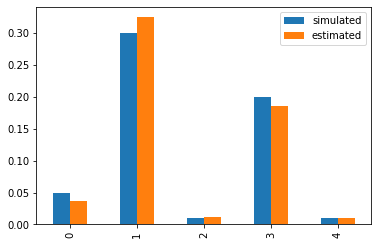

In [24]:
pandas.DataFrame({'simulated': my_recomb_rates, 'estimated': est_recomb_rates}).plot.bar();

<AxesSubplot:>

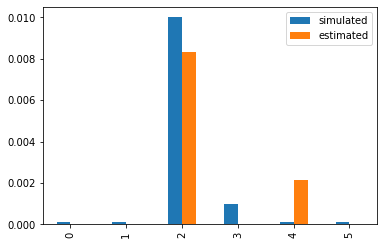

In [30]:
pandas.DataFrame({'simulated': my_mut_rates, 'estimated': est_mut_rates}).plot.bar();